In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"
from file_cache import *


2020-05-26 16:27:46,970 util_log.py[153] INFO Start the program at:amax7, 127.0.1.1, with:Load module


File_cache: Adjust notebook work fold to:/share/felix/pj/brain_seg/


In [3]:
from fastai.vision import *
from fastai.vision.learner import *
from fastai.callbacks.hooks import *

In [4]:

from file_cache import *

img_file_list = glob('/share/data2/body/brain/train/image/iNPH_MRI_PROCESSED/**/*.*', recursive=True)

df = pd.DataFrame({'img_file':img_file_list})
df['p_id_path'] = df.img_file.apply(lambda val: os.path.dirname(val))
df['p_id'] = df['p_id_path'].rank(method='max').astype(int)
df.sort_values('p_id')

df['label_path'] = df.img_file.apply(lambda val: val.replace('image', 'label'))

df['valid'] = df.p_id%5 == 1

df.valid.value_counts()

2020-05-26 16:27:55,025 utils.py[129] INFO Note: NumExpr detected 48 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2020-05-26 16:27:55,026 utils.py[141] INFO NumExpr defaulting to 8 threads.


False    836
True     177
Name: valid, dtype: int64

## Datasets

In [5]:
size =224
bs = 8
print('size, bs', size, bs)

size, bs 224 8


836 177


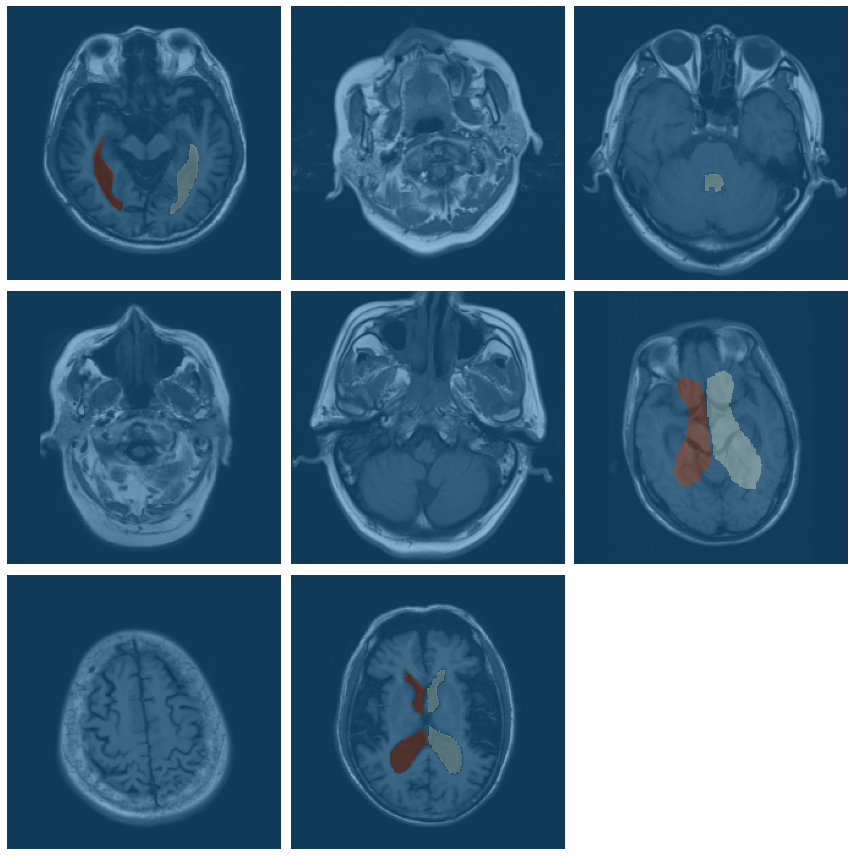

In [65]:
codes = range(5)

def get_y_fn(x):
    print(x)
    return x.replace('image', 'label')


src = (SegmentationItemList.from_df(df, path='/', cols='img_file' )
       .split_from_df(col='valid')
       #.label_from_func(get_y_fn, classes=codes)
       .label_from_df(cols='label_path', classes=codes)
      )
       #.label_from_func(cols='label_path', classes=codes))
    
print(len(src.train), len(src.valid))
#ipdb.set_trace()
# #get_transforms()
data = (src.transform(None, size=size, tfm_y=True)
        .databunch(bs=bs)
        #.normalize(imagenet_stats)
       )
data.show_batch()

In [69]:
type(data.transform())

TypeError: transform() missing 1 required positional argument: 'tfms'

In [44]:
from dataset.ds_brain_fastai import *

len(get_ds('train')), len(get_ds('valid')), 

(836, 177)

In [53]:
ds = get_ds('train')
ds[0][1].data.half()

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]], dtype=torch.float16)

In [35]:
# from dataset.ds_brain import *
dl_train =   DataLoader(DataSet_brain('train'), batch_size=8, shuffle=True)
dl_valid =   DataLoader(DataSet_brain('valid'), batch_size=2, shuffle=True)
data = DataBunch(dl_train, dl_valid)

data.show_batch()

======== train
False    836
True     177
Name: valid, dtype: int64
> /home/aladdin1/anaconda3/lib/python3.7/site-packages/fastai/basic_data.py(185)show_batch()
    184         "Show a batch of data in `ds_type` on a few `rows`."
4-> 185         x,y = self.one_batch(ds_type, True, True)
    186         if reverse: x,y = x.flip(0),y.flip(0)

ipdb> type(train_ds
*** SyntaxError: unexpected EOF while parsing
ipdb> type(train_ds)
*** NameError: name 'train_ds' is not defined
ipdb> type(self.train_ds)
<class 'dataset.ds_brain.DataSet_brain'>
ipdb> c


AttributeError: 'DataSet_brain' object has no attribute 'x'

In [71]:
def format_time(t):
    t = int(t)
    h,m,s = t//3600, (t//60)%60, t%60
    if h!= 0: return f'{h}:{m:02d}:{s:02d}'
    else:     return f'{m:02d}:{s:02d}'
        
from         
time()

TypeError: 'module' object is not callable

In [80]:
ed = edict()
ed.a = torch.rand(1)
ed.b = torch.rand(2)
ed

{'a': tensor([0.6788]), 'b': tensor([0.7050, 0.5294])}

'2020-05-27 13:18:38'

In [153]:
np.set_printoptions(precision=4)
np.random.rand(4,5) 

array([[0.8263, 0.1273, 0.4711, 0.9416, 0.7391],
       [0.9877, 0.291 , 0.5139, 0.6147, 0.5295],
       [0.6181, 0.6624, 0.3254, 0.7449, 0.8196],
       [0.4007, 0.3279, 0.7162, 0.3999, 0.2864]])

In [ ]:
print(pd.DataFrame(np.random.rand(4,5)).head(1))

In [76]:
format_time(time() - t)

'00:02'

In [147]:
import pandas
df = pandas.DataFrame({'c': 1, 'd': 2.3}, index=[0], )
formats = {'c': '{: 10d}', 'd': '{: 2.5f}'}
formatters = {k: v.format for k, v in formats.items()}
print(formatters)
print(df.to_string(formatters=formatters, index=False, header=True))
print(df.to_string(formatters=formatters, index=False, header=False))

{'c': <built-in method format of str object at 0x7fab23442970>, 'd': <built-in method format of str object at 0x7fab23442070>}
         c        d
         1  2.30000
         1  2.30000


In [148]:
'{: 2.5f}'.format

<function str.format>

In [19]:
# data.show_batch(4, figsize=(10,7), ds_type=DatasetType.Valid)

## Model

In [20]:
name2id = {v:k for k,v in enumerate(codes)}
#void_code = name2id['Void']

# def acc_camvid(input, target):
#     target = target.squeeze(1)
#     mask = target != void_code
#     return (input.argmax(dim=1)[mask]==target[mask]).float().mean()

In [21]:
wd = 1e-2


In [22]:
print('abc')

abc


In [23]:
#多类别的Dice Metrics

from brain.metrics import * 

from functools import partial
def dice_fn(cls_id):
    fn = partial(dice_multiply, cls_id=cls_id) 
    fn.__name__ = f'dice_{cls_id}'
    return fn
 

metrics_ = [ dice_fn(i) for i in range(5) ] #, accuracy,

import ipdb
#ipdb.set_trace()
from brain.module_unet import *
#model_fn = partial( unet_normal,   img_size = (224,224)) #n_classes=5,
#model_fn()
#models.resnet34()
# for sn, child in enumerate(learn.model.children()):
#     print(sn, '===', child)

In [24]:
#ipdb.set_trace()

# model = dynamic_unet( n_classes=5, img_size = (224,224))
# #learn = unet_learner(data, dynamic_unet, metrics=metrics, wd=wd)
# learn = Learner(data, model, metrics=metrics_, wd=wd)

In [26]:
from fastai.vision.learner import cnn_config
# def unet_learner(data:DataBunch, arch:Callable, pretrained:bool=True, blur_final:bool=True,
#                  norm_type:Optional[NormType]=NormType, split_on:Optional[SplitFuncOrIdxList]=None, blur:bool=False,
#                  self_attention:bool=False, y_range:Optional[Tuple[float,float]]=None, last_cross:bool=True,
#                  bottle:bool=False, cut:Union[int,Callable]=None, **learn_kwargs:Any)->Learner:
#     "Build Unet learner from `data` and `arch`."
#     meta = cnn_config(arch)
#     body = create_body(arch, pretrained, cut)
#     try:    size = data.train_ds[0][0].size
#     except: size = next(iter(data.train_dl))[0].shape[-2:]
# #     model = to_device(models.unet.DynamicUnet(body, n_classes=data.c, img_size=size, blur=blur, blur_final=blur_final,
# #           self_attention=self_attention, y_range=y_range, norm_type=norm_type, last_cross=last_cross,
# #           bottle=bottle), data.device)
#     model = dynamic_unet(arch=models.resnet34, n_classes=5, img_size = (224,224))
#     learn = Learner(data, model,metrics=metrics_, )
# #     learn.split(ifnone(split_on, meta['split']))
# #     if pretrained: learn.freeze()
# #     apply_init(model[2], nn.init.kaiming_normal_)
#     return learn


model = dynamic_unet( n_classes=5, img_size = (224,224))


# model = unet_normal( n_classes=5, img_size = (224,224))
 
#ipdb.set_trace() 
learn = Learner(data, model, metrics=metrics_, 
                loss_func =  CrossEntropyFlat(axis=1) , wd=0
                )


print(learn.loss_func)

lr = 0.001
wd = 0
import ipdb
#ipdb.set_trace()
# learn.fit(5, slice(lr))

# learn.lr = learn.lr_range(lr)
# if learn.wd is None: learn.wd = learn.wd


learn.create_opt(lr, wd)
#learn.opt =  torch.optim.Adam(model.parameters(), lr=lr, betas=(0.9, 0.99))

#ipdb.set_trace()            
from fastai.basic_train import fit
#fit(5, learn, metrics=metrics_, callbacks=[learn.callback_fns[0](learn)])
learn.fit_one_cycle(5, slice(lr),pct_start=0.9)

FlattenedLoss of CrossEntropyLoss()


epoch,train_loss,valid_loss,dice_0,dice_1,dice_2,dice_3,dice_4,time
0,0.103563,0.048487,0.991192,0.531086,0.678961,0.915624,0.893794,00:16
1,0.034840,0.033211,0.995508,0.839841,0.792869,0.915624,0.893794,00:16
2,0.028425,0.027589,0.995954,0.852915,0.790538,0.882494,0.888708,00:16
3,0.023775,0.029403,0.995265,0.812036,0.781250,0.908610,0.907488,00:16
4,0.065149,0.063987,0.988198,0.537577,0.543272,0.915624,0.893794,00:16


In [62]:
list(torch.rand(3,).numpy().round(4))

[0.1917, 0.3274, 0.5387]

In [ ]:
F.cross_entropy(torch.rand(5,7), torch.ones(5,).long())

In [26]:
learn.create_opt(lr, wd)
learn.opt

OptimWrapper over Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.99)
    eps: 1e-08
    lr: 0.0001
    weight_decay: 0

Parameter Group 1
    amsgrad: False
    betas: (0.9, 0.99)
    eps: 1e-08
    lr: 0.0001
    weight_decay: 0
).
True weight decay: True

In [16]:
#from fastai.vision.learner import cnn_config
def unet_learner2(arch:Callable=models.resnet34, pretrained:bool=True, blur_final:bool=True,
                 norm_type:Optional[NormType]=NormType, split_on:Optional[SplitFuncOrIdxList]=None, 
                  blur:bool=False,
                 self_attention:bool=False, y_range:Optional[Tuple[float,float]]=None, last_cross:bool=True,
                 bottle:bool=False, cut:Union[int,Callable]=None, **learn_kwargs:Any)->Learner:
    "Build Unet learner from `data` and `arch`."
    #meta = cnn_config(arch)
    body = create_body(arch, pretrained, cut)

    img_size = (224, 224)
#     model = to_device(models.unet.DynamicUnet(body, n_classes=data.c, img_size=size, blur=blur, blur_final=blur_final,
#           self_attention=self_attention, y_range=y_range, norm_type=norm_type, last_cross=last_cross,
#           bottle=bottle), data.device)
    
    model = to_device(
        models.unet.DynamicUnet(body, n_classes=5, img_size=img_size, blur=blur, blur_final=blur_final,
                                self_attention=self_attention, y_range=y_range, norm_type=norm_type,
                                last_cross=last_cross,
                                bottle=bottle), 'cuda')
    return model
# learn = Learner(data, model, metrics=metrics_)# **learn_kwargs)
# #     learn.split(ifnone(split_on, meta['split']))
# #     if pretrained: learn.freeze()
# #     apply_init(model[2], nn.init.kaiming_normal_)
# return learn

model = unet_learner2()

#learn = unet_learner(data, unet_learner, metrics=metrics_)
learn = Learner(data, model,metrics=metrics_, )
lr = 1e-4

learn.fit(5, slice(lr))

epoch,train_loss,valid_loss,dice_0,dice_1,dice_2,dice_3,dice_4,time
0,0.050685,0.014498,0.997755,0.863628,0.868703,0.928543,0.890903,00:14
1,0.018515,0.009267,0.998260,0.916078,0.842119,0.913109,0.894161,00:14
2,0.010506,0.007657,0.998489,0.927549,0.910056,0.945445,0.962045,00:14
3,0.007537,0.006427,0.998675,0.936732,0.929512,0.964873,0.955256,00:14
4,0.006353,0.006630,0.998687,0.935566,0.928846,0.943400,0.957094,00:14


In [ ]:

# def dynamic_unet2(arch: Callable=models.resnet34, pretrained: bool = True, blur_final: bool = True,
#                  norm_type: Optional[NormType] = NormType, split_on: Optional[SplitFuncOrIdxList] = None,
#                  blur: bool = False,
#                  self_attention: bool = False, y_range: Optional[Tuple[float, float]] = None, last_cross: bool = True,
#                  bottle: bool = False, cut: Union[int, Callable] = None,
#                  n_classes=2, img_size=(224, 224), in_channels=1,
#                  **learn_kwargs: Any) -> Learner:
#     body = create_body(arch, pretrained, cut)
#     model = to_device(
#         models.unet.DynamicUnet(body, n_classes=5, img_size=(224,224), blur=blur, blur_final=blur_final,
#                                 self_attention=self_attention, y_range=y_range, norm_type=norm_type,
#                                 last_cross=last_cross,
#                                 bottle=bottle), 'cuda')
#     return model

# #     body = create_body(arch, pretrained, cut)
# #     model = to_device(
# #         models.unet.DynamicUnet(body, n_classes=n_classes, img_size=img_size, blur=blur, blur_final=blur_final,
# #                                 self_attention=self_attention, y_range=y_range, norm_type=norm_type,
# #                                 last_cross=last_cross,
# #                                 bottle=bottle), 'cuda')
# #     return model

# model = dynamic_unet2(arch=models.resnet34)
#model = unet_learner()
learn = Learner(data, unet_normal(), metrics=metrics_, )

#learn = unet_learner(data, models.resnet34, metrics=metrics_, wd=wd)

lr = 1e-3

learn.fit_one_cycle(50, slice(lr),pct_start=0.9)



epoch,train_loss,valid_loss,dice_0,dice_1,dice_2,dice_3,dice_4,time
0,1.558462,1.423754,0.901191,0.147473,0.118232,0.001178,0.000826,00:17
1,1.475389,1.338712,0.972703,0.220792,0.221163,0.009587,0.003489,00:17
2,1.412768,1.251522,0.982522,0.252534,0.242390,0.111969,0.022822,00:17
3,1.338289,1.220037,0.990291,0.314251,0.262006,0.192063,0.067535,00:17
4,1.290561,1.250566,0.980734,0.242785,0.235228,0.107650,0.020944,00:17
5,1.207641,1.112568,0.996454,0.367636,0.422151,0.695504,0.626091,00:17
6,1.111272,0.995770,0.996965,0.394952,0.457658,0.716980,0.804696,00:17
7,1.003530,0.843483,0.997069,0.389253,0.438200,0.861413,0.802877,00:17
8,0.873511,0.747396,0.997739,0.448787,0.476329,0.787953,0.862297,00:17


In [27]:
lr = 1e-3

learn.fit_one_cycle(50, slice(lr), pct_start=0.9)

epoch,train_loss,valid_loss,dice_0,dice_1,dice_2,dice_3,dice_4,time
0,0.032424,0.023596,0.998670,0.871512,0.842797,0.938983,0.878907,00:17
1,0.026245,0.026276,0.998682,0.846871,0.840583,0.866551,0.935002,00:17
2,0.023137,0.024164,0.998722,0.877432,0.843211,0.921170,0.962690,00:17
3,0.020238,0.033330,0.998701,0.841590,0.893263,0.951973,0.961501,00:17
4,0.018891,0.027317,0.998636,0.848993,0.910250,0.879803,0.962091,00:17
5,0.017729,0.016226,0.998545,0.866450,0.863972,0.895442,0.931172,00:17
6,0.022756,0.029451,0.998451,0.861687,0.810051,0.931781,0.894330,00:17
7,0.018780,0.015718,0.998268,0.820671,0.702036,0.877010,0.942949,00:17
8,0.020756,0.054408,0.998252,0.806181,0.894589,0.701782,0.526604,00:17
9,0.020395,0.014350,0.998540,0.924024,0.898093,0.851696,0.915742,00:17


In [28]:
learn.model

UNet(
  (down_path): ModuleList(
    (0): UNetConvBlock(
      (residual_input_conv): Conv2d(3, 64, kernel_size=(1, 1), stride=(1, 1))
      (residual_batchnorm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (block): Sequential(
        (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU()
        (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): ReLU()
        (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (1): UNetConvBlock(
      (residual_input_conv): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1))
      (residual_batchnorm): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (block): Sequential(
        (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): 

In [32]:
model = dynamic_unet(arch=models.resnet34, n_classes=5, img_size = (224,224))
learn = Learner(data, model,metrics=metrics_, )

#learn = unet_learner(data, models.resnet34, metrics=metrics_, wd=wd)

lr = 1e-4

learn.fit(5, slice(lr))

epoch,train_loss,valid_loss,dice_0,dice_1,dice_2,dice_3,dice_4,time
0,0.107259,0.041501,0.994678,0.554596,0.502820,0.928543,0.890903,01:10
1,0.049837,0.028219,0.995442,0.683879,0.787713,0.928543,0.890903,01:11
2,0.031170,0.014461,0.997703,0.839610,0.741323,0.928543,0.890903,01:12
3,0.018058,0.011431,0.998046,0.754278,0.808887,0.892306,0.890903,01:12
4,0.013280,0.010904,0.998035,0.871686,0.839432,0.914724,0.890903,01:12


Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/aladdin1/anaconda3/lib/python3.7/multiprocessing/queues.py", line 232, in _feed
    close()
  File "/home/aladdin1/anaconda3/lib/python3.7/multiprocessing/connection.py", line 177, in close
    self._close()
  File "/home/aladdin1/anaconda3/lib/python3.7/multiprocessing/connection.py", line 361, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor
  File "/home/aladdin1/anaconda3/lib/python3.7/multiprocessing/queues.py", line 232, in _feed
    close()
  File "/home/aladdin1/anaconda3/lib/python3.7/multiprocessing/connection.py", line 177, in close
    self._close()
  File "/home/aladdin1/anaconda3/lib/python3.7/multiprocessing/connection.py", line 361, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/aladdin1/anaconda3/lib/python3.7/multipro

In [15]:
os.path.abspath('./output/model')

'/share/felix/pj/brain_seg/output/model'

In [22]:

learn.model_dir=os.path.abspath('./output/model')
os.makedirs(learn.model_dir, exist_ok=True)
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


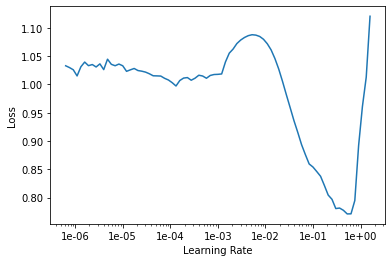

In [23]:
learn.recorder.plot()

In [18]:
lr = 1e-4

learn.fit(5, slice(lr))

epoch,train_loss,valid_loss,dice_0,dice_1,dice_2,dice_3,dice_4,time
0,0.101391,0.031062,0.995145,0.667206,0.653896,0.928543,0.890903,01:06
1,0.042806,0.017428,0.997228,0.781809,0.797102,0.928543,0.890903,01:05
2,0.025368,0.023985,0.995991,0.787715,0.776365,0.928543,0.890903,01:05
3,0.018917,0.028461,0.994469,0.522919,0.575411,0.691862,0.890903,01:06
4,0.016644,0.014424,0.997523,0.670234,0.808209,0.857648,0.890903,01:06


In [18]:
lr = 1e-4
learn.fit_one_cycle(5, slice(lr), pct_start=0.9)

epoch,train_loss,valid_loss,dice_0,dice_1,dice_2,dice_3,dice_4,time
0,0.677941,0.138525,0.989899,0.456658,0.020030,0.928543,0.008947,00:13
1,0.181068,0.031367,0.994071,0.774148,0.236783,0.928543,0.445917,00:13
2,0.056620,0.017546,0.997126,0.823155,0.835816,0.926150,0.890903,00:13
3,0.024056,0.010952,0.998042,0.843669,0.861765,0.906503,0.897325,00:13
4,0.013958,0.010376,0.998113,0.898321,0.880896,0.941537,0.911558,00:15


In [19]:
lr = 1e-4
learn.fit_one_cycle(5, slice(lr), pct_start=0.9)

epoch,train_loss,valid_loss,dice_0,dice_1,dice_2,dice_3,dice_4,time
0,0.008133,0.009054,0.998272,0.893256,0.893922,0.940705,0.939579,00:14
1,0.007692,0.009093,0.998201,0.824754,0.856663,0.939227,0.949726,00:13
2,0.008122,0.009917,0.998131,0.909248,0.893063,0.950046,0.952405,00:13
3,0.008198,0.007862,0.998488,0.919245,0.911258,0.952213,0.958844,00:13
4,0.006357,0.007123,0.998586,0.925138,0.907763,0.954668,0.953996,00:13


In [20]:
lr = 1e-4
learn.fit_one_cycle(10, slice(lr), pct_start=0.9)

epoch,train_loss,valid_loss,dice_0,dice_1,dice_2,dice_3,dice_4,time
0,0.004732,0.007082,0.998612,0.929776,0.914569,0.952717,0.958974,00:13
1,0.004485,0.007162,0.998591,0.928221,0.918686,0.952330,0.959283,00:13
2,0.004263,0.007063,0.998655,0.930663,0.923215,0.962657,0.962846,00:13
3,0.004154,0.007414,0.998654,0.930143,0.920172,0.962028,0.957052,00:13
4,0.004708,0.007645,0.998518,0.911722,0.922798,0.949589,0.945514,00:13
5,0.004822,0.007336,0.998706,0.937998,0.914496,0.963110,0.960703,00:13
6,0.006813,0.009476,0.998461,0.928641,0.890621,0.947667,0.941609,00:14
7,0.004944,0.006329,0.998742,0.938510,0.924690,0.957952,0.946992,00:13
8,0.003862,0.006800,0.998718,0.935182,0.930016,0.939165,0.957413,00:13
9,0.003389,0.006684,0.998791,0.937917,0.928837,0.963635,0.965880,00:13


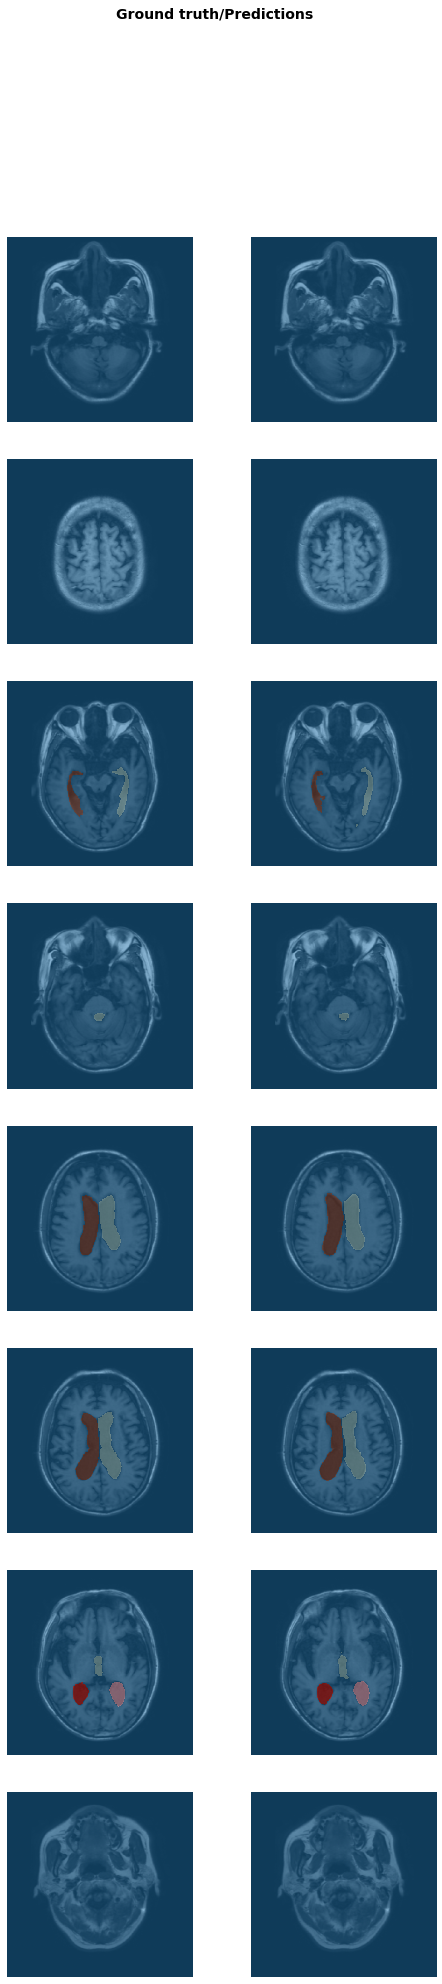

In [21]:
learn.show_results(DatasetType.Valid, rows=40)
